<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/AA_3_02_LinearRegRessionSt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression Models

In [ ]:
import matplotlib.pyplot as plt
#% matplotlib inline
import numpy as np
np.random.seed(42)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
X = 2*np.random.rand(100,1)

In [ ]:
y = 4 + 3*X + np.random.randn(100,1)

## 1. Linear Regression with Randomly Generated Data

- Generate random data for X and y and plot it
- Concatenate $x0=1$ to X, representing the bias term
- Find the best coefficient values using mathematical closed form solution
- Predict the y value for new data points of `[0]` and `[2]`
- Fit a prediction line to the previously generated random data set
- Find the coefficients and the prediction for the same new data points when using `scikitlearn`'s 

income = age + education + gender + marital status + ....

income = w0*1 + w1*age + w2*education + w3*gender + w4*marital status + ....

income


income_hat_1 = w0*1 + w1*34 + w2*15 + w3*1 + w4*1

income_1

income_hat_2 = w0*1 + w1*38 + w2*12 + w3*0 + w4*1

income_2


(income_1-income_hat_1)^2 + (income_2-income_hat_2)^2 + ...


my goal is minimize this value

minimize --> (income_1-income_hat_1)^2 + (income_2-income_hat_2)^2 + ...


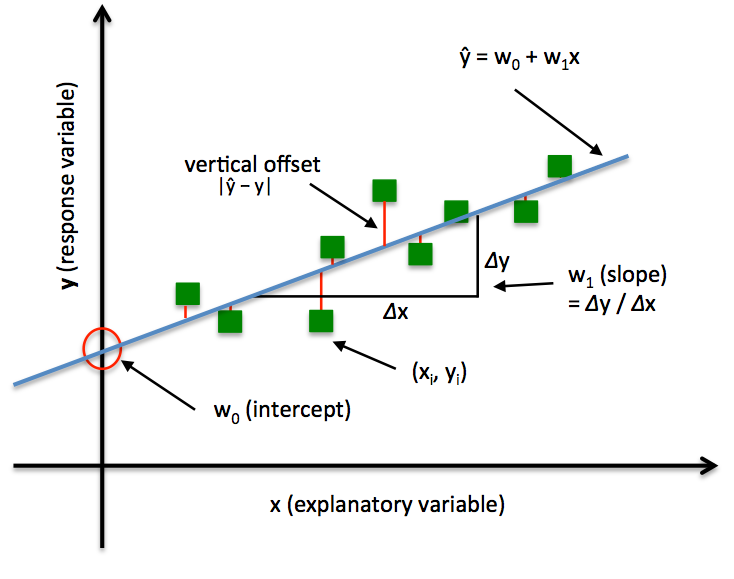

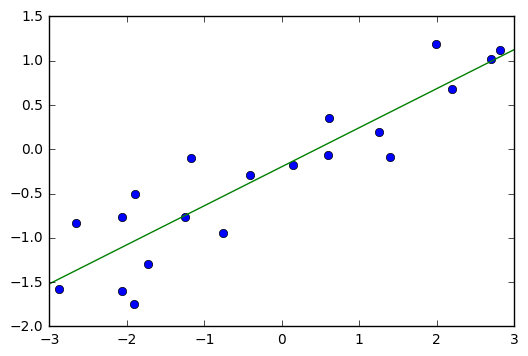

Wage = w0 + w1 * Age + noise



P1: Wage1hat0 = w00 + w01 * Age1

P2: Wage2hat0 = w00 + w01 * Age2

....

PN: Wage2hat0 = w00 + w01 * AgeN

These predictions are based on a specific co=[w00 w01] values

SquaredError0 = (Wage1 - Wage1hat0)^2 + (Wage2 - Wage2hat0)^2 + ... + (WageN - WageNhat0)^2

P1: Wage1hat1 = w10 + w11 * Age1

P2: Wage2hat1 = w10 + w11 * Age2

....

PN: Wage2hat1 = w10 + w11 * AgeN

These predictions are based on a specific c1=[w10 w11] values

SquaredError0 = (Wage1 - Wage1hat1)^2 + (Wage2 - Wage2hat1)^2 + ... + (WageN - WageNhat1)^2

The question is: 

Which set ofw's (c) gives us the minimum sum of the squared error

$ \min _{w} \frac{1}{N} \sum_{i=1}^{N}(y_i-\hat y_{i})^2 $


Minimum Mean Squared Error 

- MMSE

Let's say w_opt = 3 ---> this is the w value giving me MMSE

If w=4 then my total squared error > MMSE

or

If w=2 then my total squared error > MMSE

Let's say w_opt = 3 ----> this is the w value giving me MMSE

If w = 4 ---> then my total squared error > MMSE

or

If w = 2 ---> then my total squared error > MMSE

To find the optimum w value:

1. Start from some random w value
2. To answer the question of to which direction you should move on your cost/w curve, you take the derivative of your total cost fuction wrt w

$ \frac{\partial f(x)}{\partial x} $


$ \frac{d f(x)}{d x} $

$ \frac{f(x+\delta)-f(x)}{\delta} $

$\frac{d\bigg(\frac{1}{N \sum_{i=1^{N}(y_i-hat y_{i})^2\bigg)}{dw}=\}  $


$

In [ ]:
w_new = w_old + eta*derivative

In [ ]:
X_b = np.c_[np.ones((100,1)), X]

In [ ]:
X[:5]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

In [ ]:
X_b[:5]

array([[1.        , 0.06285837],
       [1.        , 1.27282082],
       [1.        , 0.62871196],
       [1.        , 1.01714138],
       [1.        , 1.81513295]])

In [ ]:
X_b.shape, X_b.T.shape

((100, 2), (2, 100))

In [ ]:
X_b.shape[0]

100

In [ ]:
# X_b = [1 9
#       1 4
#       1 7]

#  w = [4 2]

In [ ]:
# yhat1, yhat2, yhat3

In [ ]:
# yhat1 = 4*1 + 2*9  
# yhat2 = 4*1 + 2*4 
# yhat3 = 4*1 + 2*7

In [ ]:
# [4 2]*[1
#        9]

# 4*1 + 2*9

In [ ]:
# [4 2]*[1
#        4]

# 4*1 + 2*4

In [ ]:
# [4 2]*[1
#        7]

# 4*1 + 2*7

In [ ]:
#[4 2]*[1 1 1
#       9 4 7]

In [ ]:
# w * X_b^T = X_b*w

In [ ]:
np.random.randn(2,1).shape

(2, 1)

In [ ]:
from numpy.lib.function_base import gradient
eta = 0.1 # it is hyperparameter
N=X_b.shape[0]
w=np.random.randn(2,1)
n_iterations = 2000

for iteration in range(n_iterations):
  gradients = 2/N * X_b.T.dot(X_b.dot(w)-y)
  w = w - eta * gradients

In [ ]:
w

array([[5.79530087],
       [0.67247031]])

In [ ]:
from numpy.lib.function_base import gradient
eta = 0.001 # it is hyperparameter
N=X_b.shape[0]
w=np.random.randn(2,1)
n_iterations = 2000

for iteration in range(n_iterations):
  gradients = 2/N * X_b.T.dot(X_b.dot(w)-y)
  w = w - eta * gradients

In [ ]:
w

array([[4.10402527],
       [2.86645496]])

## 2. Polynomial Features

- Generate random data for X and y and plot it. this time, y will be a function of a polynomial.
- Transform the feature set using `PolynomialFeatures`
- Fit LinearRegression model to the transformed data
- Fit the data without transformation
- Plot the prediction lines for both polynomial regression and linear regression. Observe which one fits better to the dataset


In [ ]:
np.random.rand(100,1)

array([[0.28077236],
       [0.02431597],
       [0.6454723 ],
       [0.17711068],
       [0.94045858],
       [0.95392858],
       [0.91486439],
       [0.3701587 ],
       [0.01545662],
       [0.92831856],
       [0.42818415],
       [0.96665482],
       [0.96361998],
       [0.85300946],
       [0.29444889],
       [0.38509773],
       [0.85113667],
       [0.31692201],
       [0.16949275],
       [0.55680126],
       [0.93615477],
       [0.6960298 ],
       [0.57006117],
       [0.09717649],
       [0.61500723],
       [0.99005385],
       [0.14008402],
       [0.51832965],
       [0.87737307],
       [0.74076862],
       [0.69701574],
       [0.70248408],
       [0.35949115],
       [0.29359184],
       [0.80936116],
       [0.81011339],
       [0.86707232],
       [0.91324055],
       [0.5113424 ],
       [0.50151629],
       [0.79829518],
       [0.64996393],
       [0.70196688],
       [0.79579267],
       [0.89000534],
       [0.33799516],
       [0.37558295],
       [0.093

In [ ]:
X=2*np.random.rand(100,1) # 

In [ ]:
y = 4 + 3*X + np.random.randn(100,1) # target variable


If I gave you only y and X,

can you estimate 4 and 3

In [ ]:
X_new = np.array([[0], [2]] )

In [ ]:
X_new

array([[0],
       [2]])

In [ ]:
X_new_b = np.c_[np.ones((2,1)), X_new]

In [ ]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [ ]:
y_predict = X_new_b.dot(w_best)

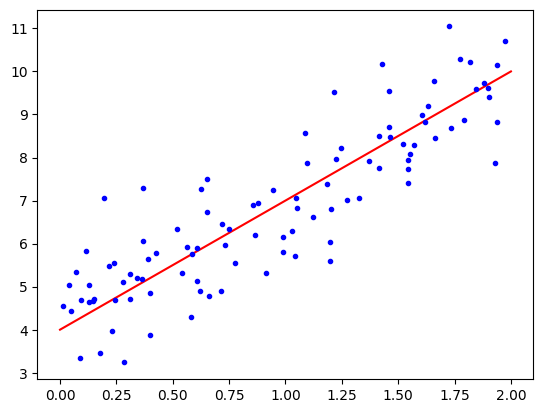

In [ ]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,'b.')

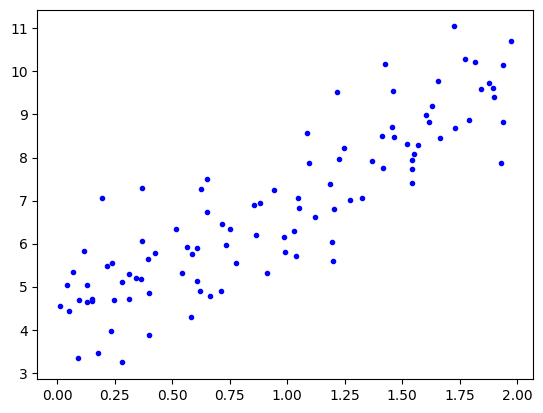

In [ ]:
plt.plot(X,y,'b.')

In [ ]:
y = 4 + 3*X

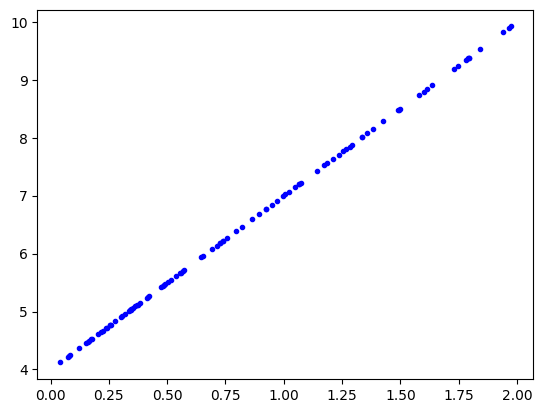

In [ ]:
plt.plot(X,y,'b.')

y = 4 + 3*X

y = 4*1 + 3*X

y = [4 3] * [1 X]




X.shape

(1049, 5)

X^T.shape

(5, 1049)

y= [w0   w1] * [1 X]


y= w*X

y *  X^T = w * X * X^T

     w = y * inv(X)

y * X^T * inv(X * X^T) = w * X * X^T * inv(X * X^T)

y * X^T * inv(X * X^T) = w





In [ ]:
X_b = np.c_[np.ones((100,1)), X]


In [ ]:
X_b.T

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.  

In [ ]:
X_b.shape, X_b.T.shape

((100, 2), (2, 100))

In [ ]:
w_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
w_best

array([[4.],
       [3.]])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## 2. Polynomial Features

- Generate random data for X and y and plot it. this time, y will be a function of a polynomial.
- Transform the feature set using PolynomialFeatures
- Fit LinearRegression model to the transformed data
- Fit the data without transformation
- Plot the prediction lines for both polynomial regression and linear regression. Observe which one fits better to the dataset

In [ ]:
X = 2*np.random.rand(100,1)

In [ ]:
y = 4 + 3*X + np.random.randn(100,1)

In [ ]:
n=200
Xrp = 6*np.random.randn(n,1)-3
yrp = 2 + 1*Xrp + 0.4*Xrp**2 + np.random.randn(n,1)

If I increase Xrp by 2 units

yrp will increase by 1*2 + 0.4*3^2 -----> polynomial feature

Text(0, 0.5, 'yrp')

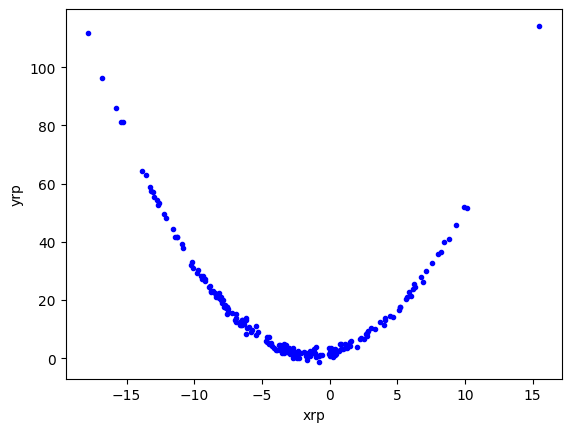

In [ ]:
plt.plot(Xrp, yrp, 'b.')
plt.xlabel('xrp')
plt.ylabel('yrp')

Text(0, 0.5, 'yrp')

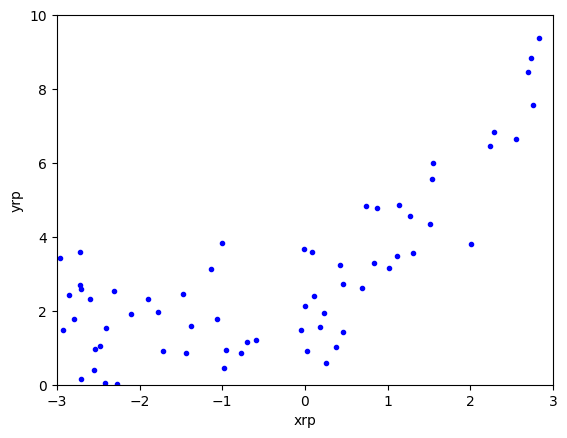

In [ ]:
plt.plot(Xrp, yrp, 'b.')
plt.axis([-3,3,0,10])
plt.xlabel('xrp')
plt.ylabel('yrp')

Wage = w0 + w1*Age + noise

Wage = w0 w1*Age + w2*Age^2 + noise



### Linear Regression


There is still a linear relationship between your target variable and features

Bot now you have polynomial features

given X, y ---> estimate w0  w1 --->  x

given Xrp  and  yrp ---> estimate w0  w1  w2 ---> xrp xrp^2

In [ ]:
Xrp[:10]

array([[-3.11107882],
       [-4.73195183],
       [-1.06368864],
       [-7.96338566],
       [ 0.11607909],
       [ 6.19643348],
       [-3.65256089],
       [-0.58972967],
       [ 1.14086395],
       [-5.40732283]])

In [ ]:
yrp[:10]

array([[ 2.27283952],
       [ 5.79203724],
       [ 1.78333691],
       [18.98183433],
       [ 2.41124368],
       [25.63014942],
       [ 4.55504424],
       [ 1.22335923],
       [ 4.86270609],
       [ 7.88025788]])

In [ ]:
Xrp2 = Xrp**2
Xrp2[:10]

array([[9.67881140e+00],
       [2.23913682e+01],
       [1.13143352e+00],
       [6.34155112e+01],
       [1.34743541e-02],
       [3.83957878e+01],
       [1.33412011e+01],
       [3.47781081e-01],
       [1.30157055e+00],
       [2.92391402e+01]])

In [ ]:
Xrp.shape

(200, 1)

In [ ]:
Xrp_poly = np.c_[Xrp, Xrp2]
Xrp_poly[:10]

array([[-3.11107882e+00,  9.67881140e+00],
       [-4.73195183e+00,  2.23913682e+01],
       [-1.06368864e+00,  1.13143352e+00],
       [-7.96338566e+00,  6.34155112e+01],
       [ 1.16079085e-01,  1.34743541e-02],
       [ 6.19643348e+00,  3.83957878e+01],
       [-3.65256089e+00,  1.33412011e+01],
       [-5.89729667e-01,  3.47781081e-01],
       [ 1.14086395e+00,  1.30157055e+00],
       [-5.40732283e+00,  2.92391402e+01]])

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression

lr_l = LinearRegression()
lr_nl = LinearRegression()

In [ ]:
lr_l.fit(Xrp,yrp)

LinearRegression()

In [ ]:
lr_nl.fit(Xrp_poly, yrp)

LinearRegression()

In [ ]:
lr_l.coef_

array([[-1.17801749]])

In [ ]:
lr_l.intercept_

array([13.68312024])

In [ ]:
lr_nl.coef_

array([[1.01825195, 0.40065451]])

In [ ]:
lr_nl.intercept_

array([2.00066445])

In [ ]:
[lr_nl.intercept_, lr_nl.coef_]

[array([2.00066445]), array([[1.01825195, 0.40065451]])]

## 3. Boston Housing Data with Polynomials

- Transform the Boston House dataset and split the dataset into test and train datasets
- Run cross validation
- Plot the coefficients of the model

In [44]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
import os

def file_locator(file_name):
  main_dir = os.getcwd()

  for dir, folder, files in os.walk(main_dir):
    for file in files:
      if file == file_name:
        file_path = os.path.join(dir,file)
  return file_path

file_path = file_locator('boston_house_prices.csv')
data = pd.read_csv(file_path)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [17]:
data.shape

(506, 14)

In [18]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [19]:
X = data.drop(['MEDV'], axis=1)

In [20]:
y = data.MEDV

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [22]:
scaler = StandardScaler()
imputer = SimpleImputer()
poly = PolynomialFeatures(degree=2, include_bias=False)


In [23]:
X_train_scaled = scaler.fit_transform(X_train)

In [24]:
X_train_imputed = imputer.fit_transform(X_train)

In [25]:
X_train_poly = poly.fit_transform(X_train_imputed)

In [26]:
X_train.shape

(379, 13)

In [27]:
X_train_poly

array([[2.61690000e-01, 0.00000000e+00, 9.90000000e+00, ...,
        1.57053690e+05, 4.64463600e+03, 1.37358400e+02],
       [6.61700000e-02, 0.00000000e+00, 3.24000000e+00, ...,
        1.46260354e+05, 3.81292680e+03, 9.94009000e+01],
       [2.14090000e-01, 2.20000000e+01, 5.86000000e+00, ...,
        1.42181785e+05, 1.35368130e+03, 1.28881000e+01],
       ...,
       [1.73310000e-01, 0.00000000e+00, 9.69000000e+00, ...,
        1.57529610e+05, 4.76676900e+03, 1.44240100e+02],
       [6.27390000e-01, 0.00000000e+00, 8.14000000e+00, ...,
        1.56515184e+05, 3.35090140e+03, 7.17409000e+01],
       [2.30040000e+00, 0.00000000e+00, 1.95800000e+01, ...,
        8.82624681e+04, 3.29769900e+03, 1.23210000e+02]])

In [28]:
X_train_poly.shape

(379, 104)

X = [x1 x2]
poly.fit_transform(X2)

X2_poly = [x1 x2 x1^2 x2^2 x1*x2]

In [31]:
12*13/2 # 12+11+10+...+1

78.0

In [32]:
78+13+13

104

In [33]:
myT = Pipeline([('scaler', StandardScaler()),
                ('imputer', SimpleImputer()),
                ('poly', PolynomialFeatures(degree=2, include_bias=False))])

In [34]:
X_poly_p = myT.fit_transform(X_train)

In [35]:
X_poly_p.shape

(379, 104)

In [38]:
lr = LinearRegression()
lr.fit(X_poly_p, y_train)

LinearRegression()

In [39]:
lr.coef_.shape

(104,)

In [47]:
lr.coef_

array([ 1.14745850e+01,  2.12015583e+01,  1.75187811e+01,  1.57941902e-01,
       -1.93773008e+00,  3.60996905e+00, -2.15828860e+00, -1.31866732e+00,
       -2.88178573e+00, -3.80981971e+00,  4.75869103e+00,  1.63258199e+00,
       -2.52616473e+00,  1.47101155e-01,  6.90915382e+01,  5.08555105e+01,
        5.35935461e+00, -1.16298066e+00,  6.80160505e-01, -5.92272327e-01,
       -5.44965668e-01, -6.73078315e+00, -2.40850092e+01,  2.27571342e+01,
       -1.97781391e-01,  1.28348084e+00, -1.04224295e-01, -1.19893350e+00,
       -6.06853803e-02, -2.99503793e+00, -2.76900503e-01,  1.32416790e-02,
       -4.34401829e-01, -2.53851953e+00,  2.51124677e+00, -8.28489193e-01,
        2.29923009e+00, -4.79748286e-01,  1.98838557e+00,  1.31377445e-01,
       -8.74185332e-02,  4.39847017e-01,  7.39933776e-01,  1.74190748e+00,
       -1.71595020e+00,  6.11217905e-02,  1.64291513e-01,  2.57298000e+00,
       -1.26724400e+00,  5.39102181e-01, -2.03619913e+00, -1.16072058e+00,
        1.11638490e-01, -

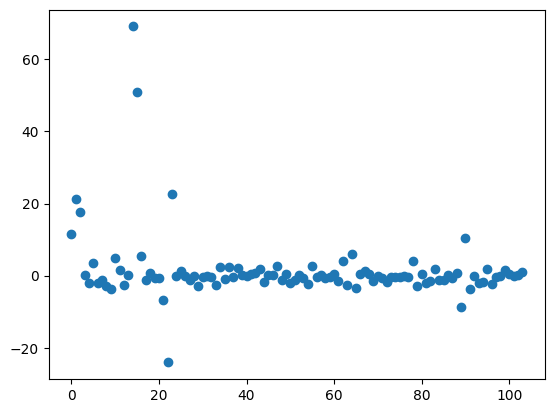

In [45]:
plt.scatter(range(X_poly_p.shape[1]), lr.coef_)

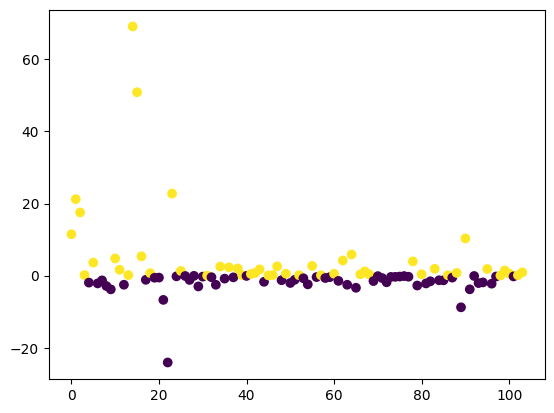

In [46]:
plt.scatter(range(X_poly_p.shape[1]), lr.coef_, c = np.sign(lr.coef_))

Some of the features of X_poly might be highly correlated

When two or more variables in your LR model are highly correlated

what happens?

In econometrics terminology, this is called MULTICOLLINEARATY

Agenew = 2*Age

Wage = w0 + w1*Age + w2*Agenew 

OVERFITTING

If you have too extreme w values, this might be an indication of your model overfitting

LinearRegression

Ridge?

Lasso?

Lets say you have x = 0.001,  w = 100

Later in your test dataset, x=10, w=100

